Lets Understand some of the most Interesting Patterns of Funding and Startups.
* How Does the Funding Ecosystem changes with respect to Time?
* What is the General Amount that Startups get in India?
* Which Kind of Industries are more preferred for Startups?
* Does Location also play a role, In determining the Growth of a Startup?
* Who plays the main role in Indian Startups Ecosystem?
* What are the different Types of Funding for Startups?

In [786]:
# importing all necessary files 
import pandas as pd                         # pandas 
import matplotlib.pyplot as plt            # matplot lib 
import seaborn as sns                       # seaborne 

# lets select  a background style
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 7)

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

import warnings
warnings.filterwarnings("ignore")

## Loading data frame 

In [787]:
# lets import the data
data = pd.read_csv("startup_funding.csv")

## Analysing Data and the general structure of dataframe

In [788]:
data.head().append(data.tail()) 

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
3043,3044,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"1,40,000",NaN


In [789]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [790]:
# All the columns are in pandas object data type. So we need to deal with that 

data[['Amount in USD']] = data[['Amount in USD']].astype(str)

In [791]:
data['Amount in USD'] # does not appear to work. So we will have to manually convert everything to numeric 

0       20,00,00,000
1          80,48,394
2        1,83,58,860
3          30,00,000
4          18,00,000
            ...     
3039       45,00,000
3040        8,25,000
3041       15,00,000
3042             nan
3043        1,40,000
Name: Amount in USD, Length: 3044, dtype: object

In [792]:
# Looking at % of data with Nan 

# iterating over pandas series 
print('The percentage of null values in terms of percentage for each column')
data_col_1 = []
data_col_2 = []
for a , b in data.count().iteritems():
    data_col_1.append(a)
    data_col_2.append(100*b/3044)
    null_percentage  = pd.Series( data_col_2 ,   index = data_col_1 )
null_percentage

The percentage of null values in terms of percentage for each column


Sr No                100.000000
Date dd/mm/yyyy      100.000000
Startup Name         100.000000
Industry Vertical     94.382392
SubVertical           69.250986
City  Location        94.086728
Investors Name        99.211564
InvestmentnType       99.868594
Amount in USD        100.000000
Remarks               13.764783
dtype: float64

In [793]:
data[(data['Industry Vertical'].isnull()) & (data['SubVertical'].notnull())]

# So we see that we cant use subvertical to replace any values of industry vertial 

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks


In [794]:
# After looking at the values of Remarks column it does not seem like we can get any 
# significant information from it . So we should drop it 

data = data.drop( ['Remarks'] , axis=1)

## Cleaning Data 

In [795]:
# There seems to be a lot of no line break characters. Dealing with that first then dealing with dates 
# Dealing with Dates 
for i in data.columns:
    data[i] = data[i].apply(lambda x : str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0",""))

In [796]:
#data[data['Date dd/mm/yyyy']== '\\\\xc2\\\\xa010/7/2015'] 
# a lot of string have this non breaking space character 

In [797]:
# Dealing with dates column 

data['Date dd/mm/yyyy'][data['Date dd/mm/yyyy']== '05/072018'] = '05/07/2018'
data['Date dd/mm/yyyy'][data['Date dd/mm/yyyy']== '01/07/015'] = '01/07/2015'
data['Date dd/mm/yyyy'][data['Date dd/mm/yyyy']== '\\\\xc2\\\\xa010/7/2015'] = '10/7/2015'
data['Date dd/mm/yyyy'][data['Date dd/mm/yyyy']== '12/05.2015'] = '12/05/2015'
data['Date dd/mm/yyyy'][data['Date dd/mm/yyyy']== '13/04.2015'] = '13/04/2015'
data['Date dd/mm/yyyy'][data['Date dd/mm/yyyy']== '15/01.2015'] = '15/01/2015'
data['Date dd/mm/yyyy'][data['Date dd/mm/yyyy']== '22/01//2015'] = '22/01/2015'

# The above dates were found out by repeatedly trying to convert the data to datetime over a number of times 
data['Date dd/mm/yyyy'] = pd.to_datetime(data['Date dd/mm/yyyy'],  format='%d/%m/%Y')

In [798]:
data.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [799]:
# analysing amount column. It seems like we have to remove the commas and the ' '
k = data['Amount in USD'][1]

In [800]:
#int(k)
print(k)

80,48,394


In [801]:
k = k.replace(',','')
int(k)

8048394

In [802]:
# performing the above operations for all 

data['Amount in USD'] = data['Amount in USD'].apply(lambda x : str(x).replace('+',''))
data['Amount in USD'] = data['Amount in USD'].apply(lambda x : -1 if x == 'undisclosed' or x == 'unknown' or x == 'Undisclosed' or x == 'N/A' 
                                                    else float(x.replace(',','')))
#data['Amount in USD'] = data['Amount in USD'].apply(lambda x : float(x))

In [803]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              3044 non-null   object        
 1   Date dd/mm/yyyy    3044 non-null   datetime64[ns]
 2   Startup Name       3044 non-null   object        
 3   Industry Vertical  3044 non-null   object        
 4   SubVertical        3044 non-null   object        
 5   City  Location     3044 non-null   object        
 6   Investors Name     3044 non-null   object        
 7   InvestmentnType    3044 non-null   object        
 8   Amount in USD      2084 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 214.2+ KB


## Done with data cleaning. 

## Looking at Data. EDA 

### Looking at funding cycle and amount 

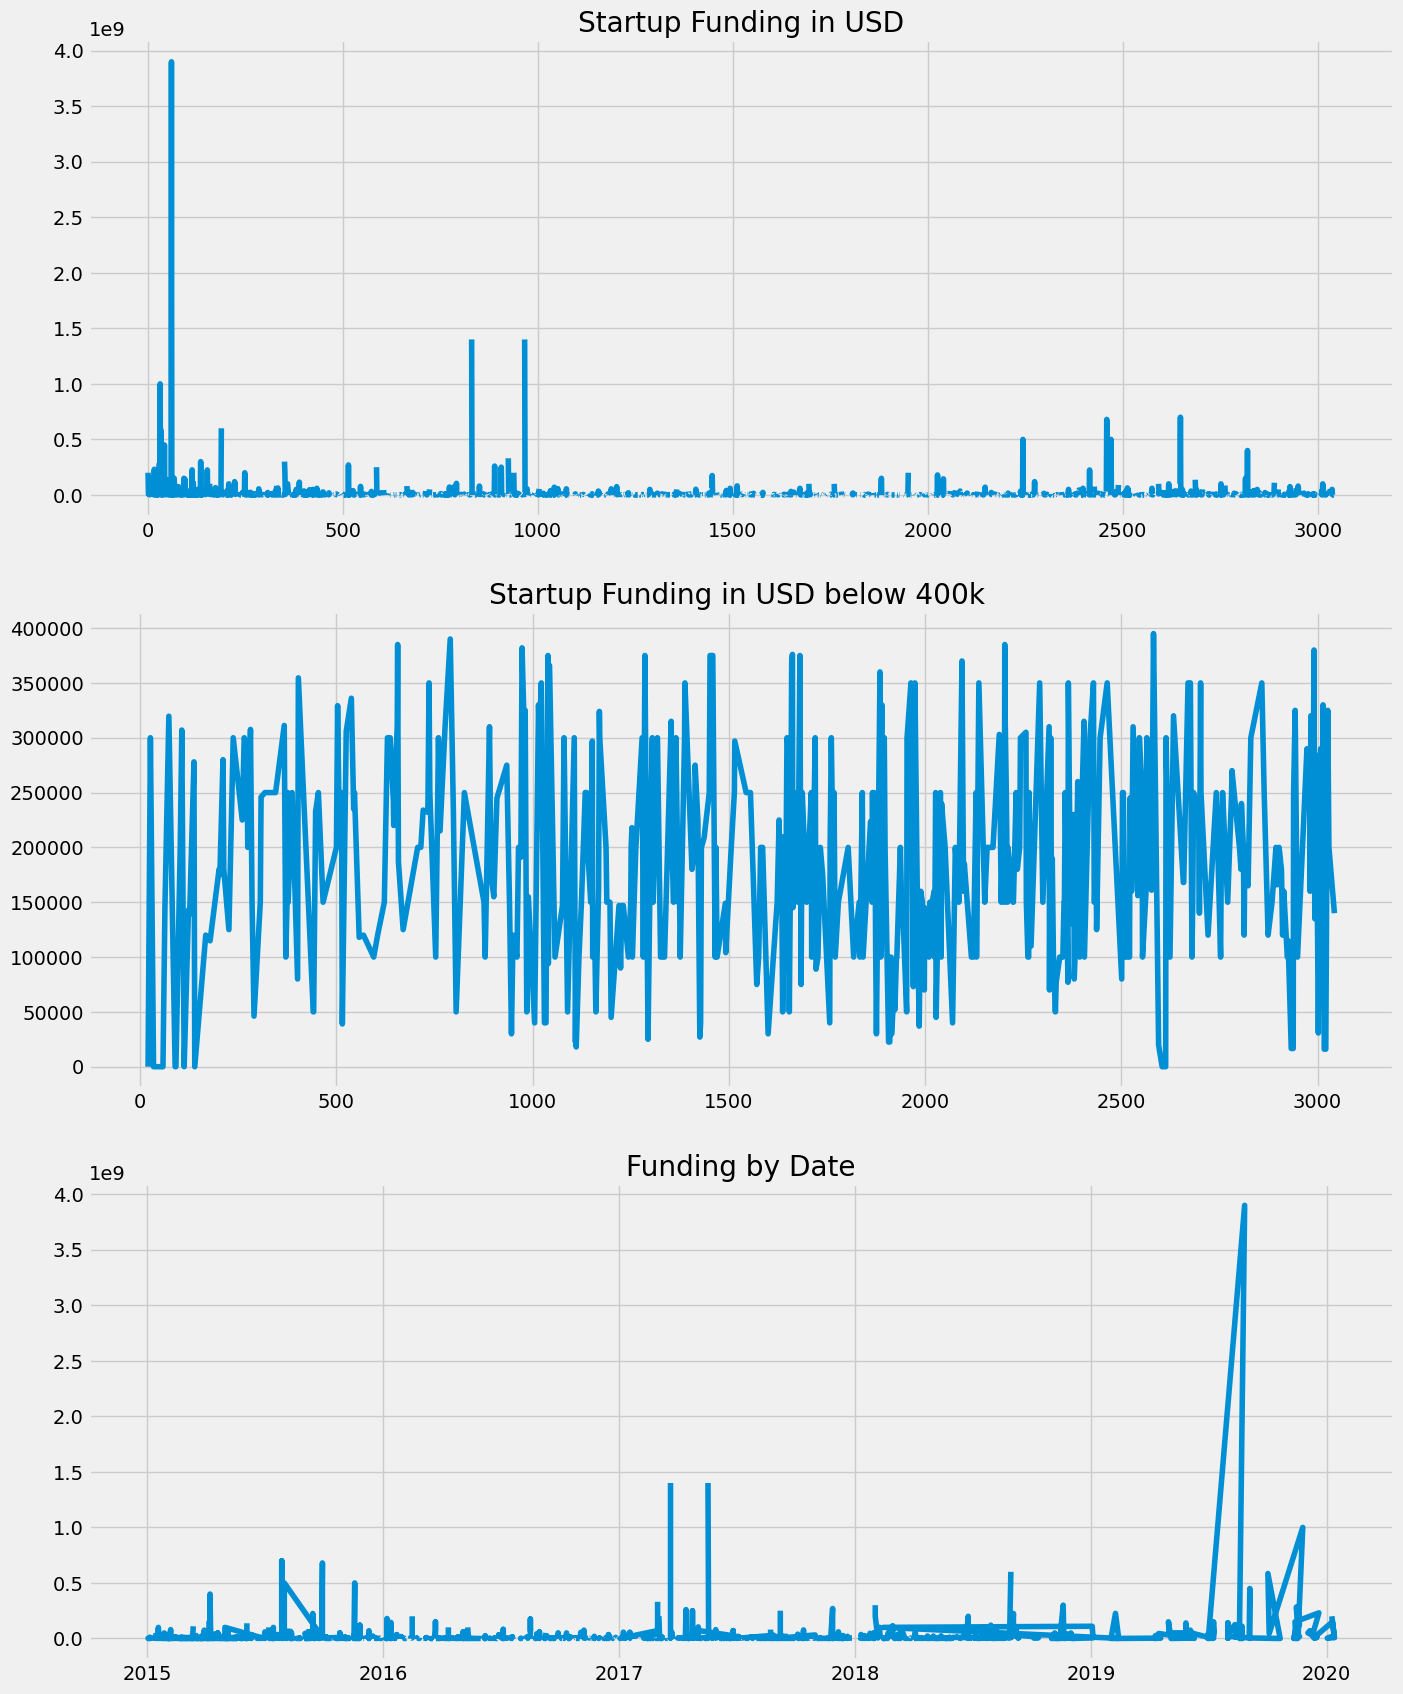

In [804]:
# analysing the startup funding cycle 
fig, ax = plt.subplots(3,1,figsize=(15,20))

ax[0].plot(data['Amount in USD'])
ax[0].set_title('Startup Funding in USD')

ax[1].plot(data[data['Amount in USD'] < 400000.0]['Amount in USD'])
ax[1].set_title('Startup Funding in USD below 400k ')

ax[2].plot(data['Date dd/mm/yyyy'] , data['Amount in USD'])
ax[2].set_title('Funding by Date')


plt.show()


In [805]:
# Lets look at total funding by year month and number of fundings by year month.
# This will help us gauge the funding change with time 

data["yearmonth"] = data['Date dd/mm/yyyy'].map(lambda x: (x.year*100)  + (x.month))
data = data.sort_values(by = ['yearmonth'], ascending = False)
funding_no_ym = data['yearmonth'].value_counts()#.sort_values(ascending = False)
funding_money_ym = data.groupby('yearmonth')['Amount in USD'].sum()#.sort_values(ascending = False)


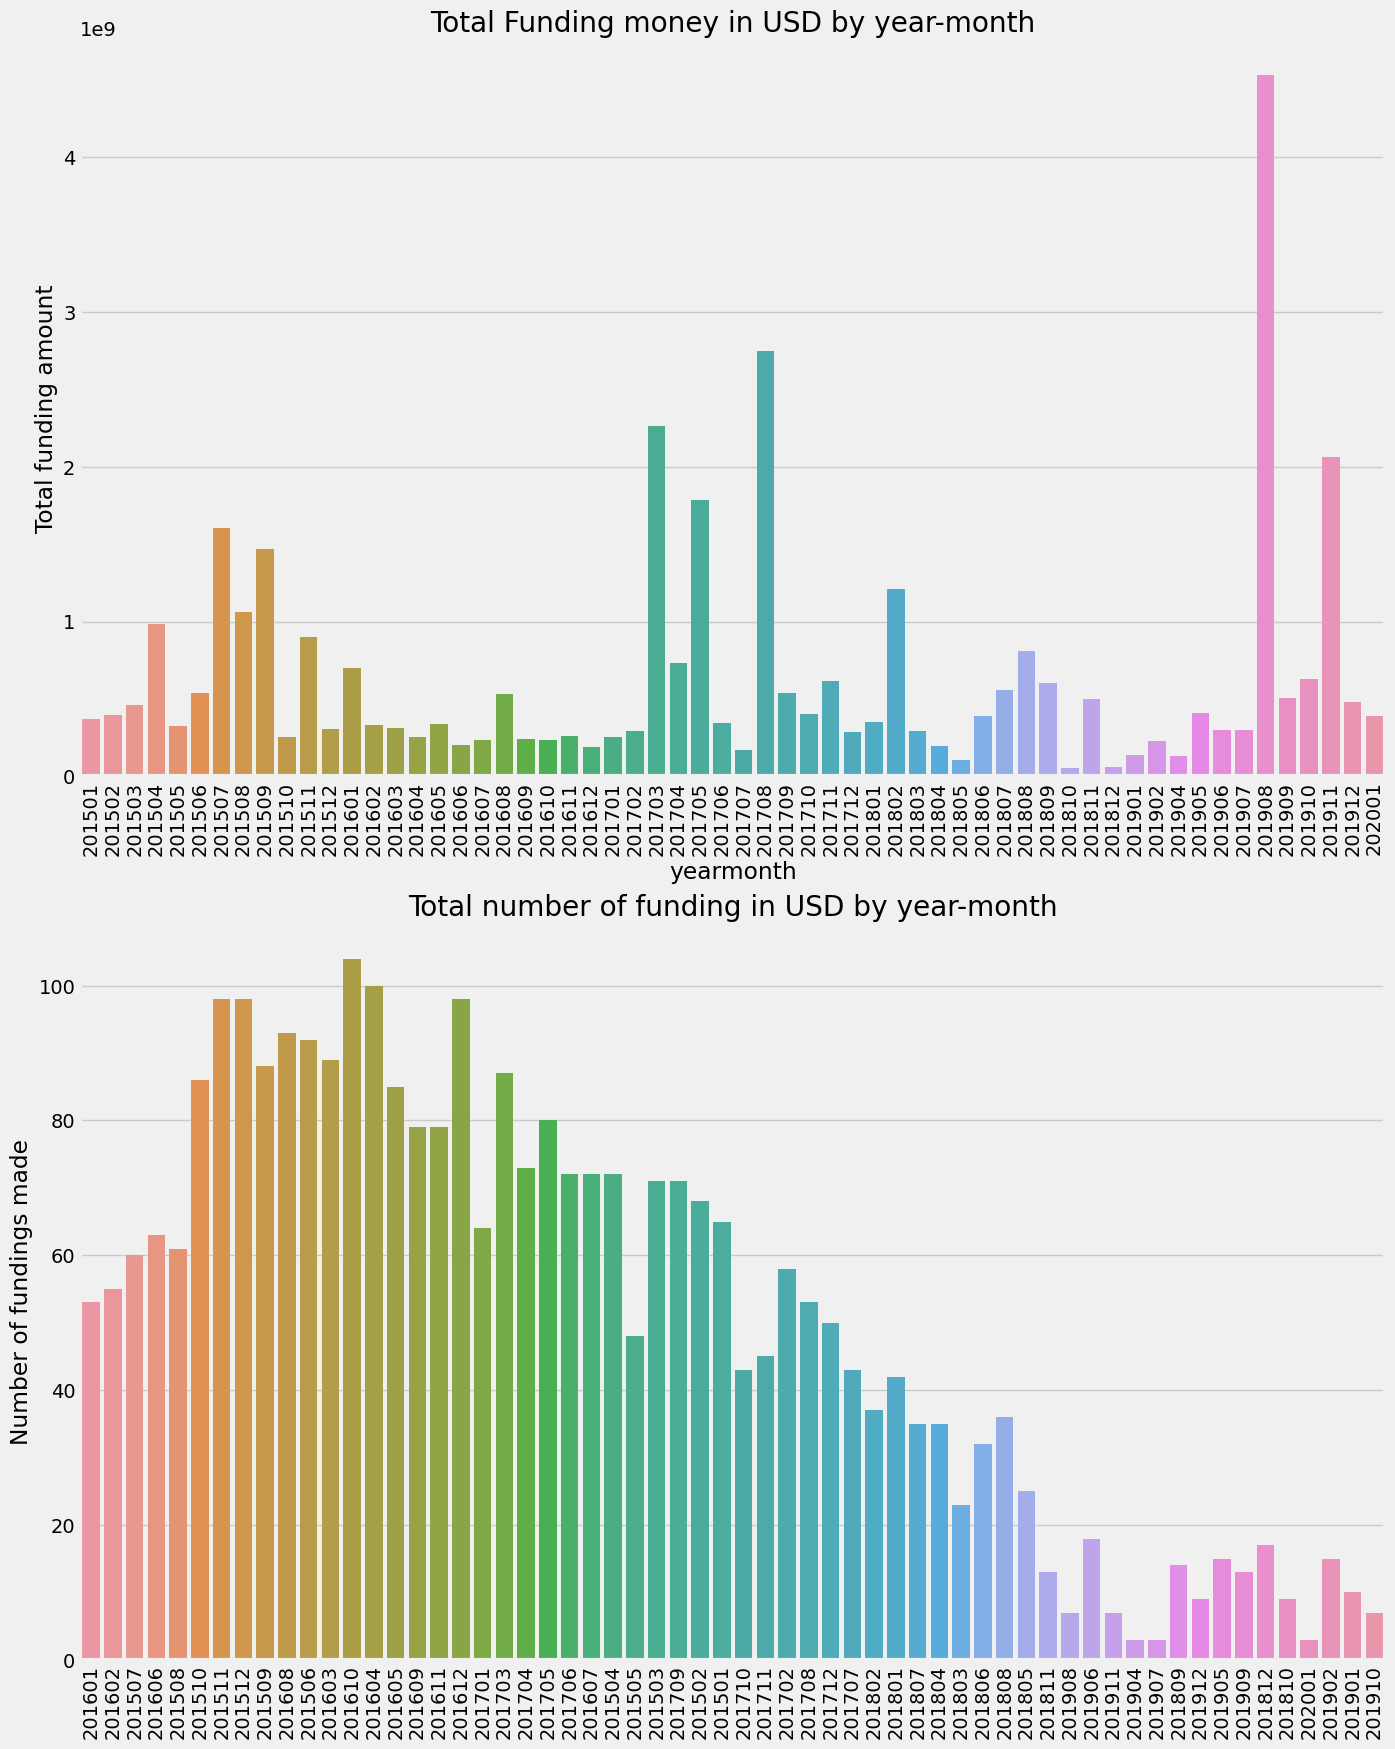

In [806]:
# analysing the startup funding cycle 
fig, ax = plt.subplots(2,1,figsize=(15,20))

sns.barplot(ax = ax[0], x = funding_money_ym.index ,y = funding_money_ym.values )
ax[0].set_title('Total Funding money in USD by year-month')
ax[0].set_xticklabels(funding_money_ym.index, rotation = 90)
ax[0].set_ylabel('Total funding amount')
#ax[0].grid(False)


sns.barplot(ax = ax[1], x = funding_no_ym.index , y = funding_no_ym.values )
ax[1].set_title('Total number of funding in USD by year-month')
ax[1].set_xticklabels(funding_no_ym.index, rotation = 90)
ax[1].set_ylabel('Number of fundings made')
#ax[1].grid(False)

plt.show()

count    2.084000e+03
mean     1.830322e+07
std      1.208278e+08
min     -1.000000e+00
25%      4.500000e+05
50%      1.700000e+06
75%      8.000000e+06
max      3.900000e+09
Name: Amount in USD, dtype: float64

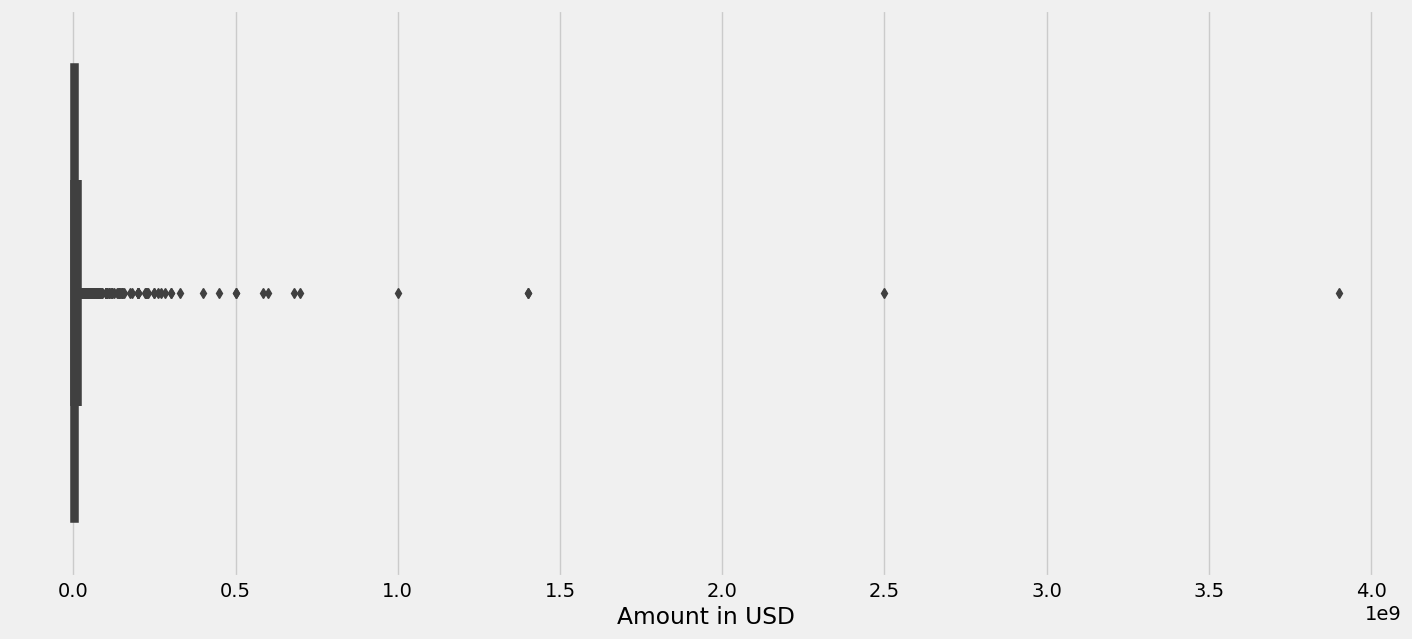

In [807]:
# Box PLot of Start up funding 
sns.boxplot(data['Amount in USD'])
data['Amount in USD'].describe()

In [808]:
data.sort_values(by = ['Amount in USD'], ascending = False).head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,yearmonth
60,61,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09,201908
651,652,2017-08-11,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09,201708
966,967,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,201703
830,831,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
31,32,2019-11-25,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,201911


In [809]:
# only 10 companies have not disclosed their funding 
data[data['Amount in USD'] == data['Amount in USD'].min()]

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,yearmonth
20,21,2019-11-17,Burger Singh,Food and Beverage,Indian Burger Brand,Gurgaon,RB Investments,Venture,-1.0,201911
34,35,2019-10-21,The Man Company,Consumer Goods,Beauty and Grooming,Gurgaon,Ayushmann Khurana,Corporate Round,-1.0,201910
58,59,2019-08-19,Mishry Reviews,Services,Product Review,Gurgaon,Vir Sanghvi,Series A,-1.0,201908
91,92,2019-05-05,StyleDotMe,E-commerce,Fashion and Shopping,Delhi,Indian Angel Network and other angel investors...,Bridge Round,-1.0,201905
89,90,2019-05-06,Ola Electric,Transport,Cabs,Bengaluru,Tata Sons,Series A,-1.0,201905
112,113,2019-02-01,FleetX,AI,Logistics,Gurgaon,India Quotient and LetsVenture\\xe2\\x80\\x99s...,Pre Series A,-1.0,201902
139,140,2018-11-22,Skillbox,Social Network,Art,Gurugram,Individual investors,Seed Funding,-1.0,201811
2604,2605,2015-07-09,Shopsity,Fashion Info Aggregator App,nan,Gurgaon,"Sandeep Aggarwal, Teruhide Sato",Seed Funding,-1.0,201507
2613,2614,2015-07-14,Zenify,Residential Rental management platform,nan,Bangalore,Atul Jalan,Seed Funding,-1.0,201507
2611,2612,2015-07-13,Satvacart,Online Grocery Delivery,nan,Gurgaon,Palaash Ventures,Seed Funding,-1.0,201507


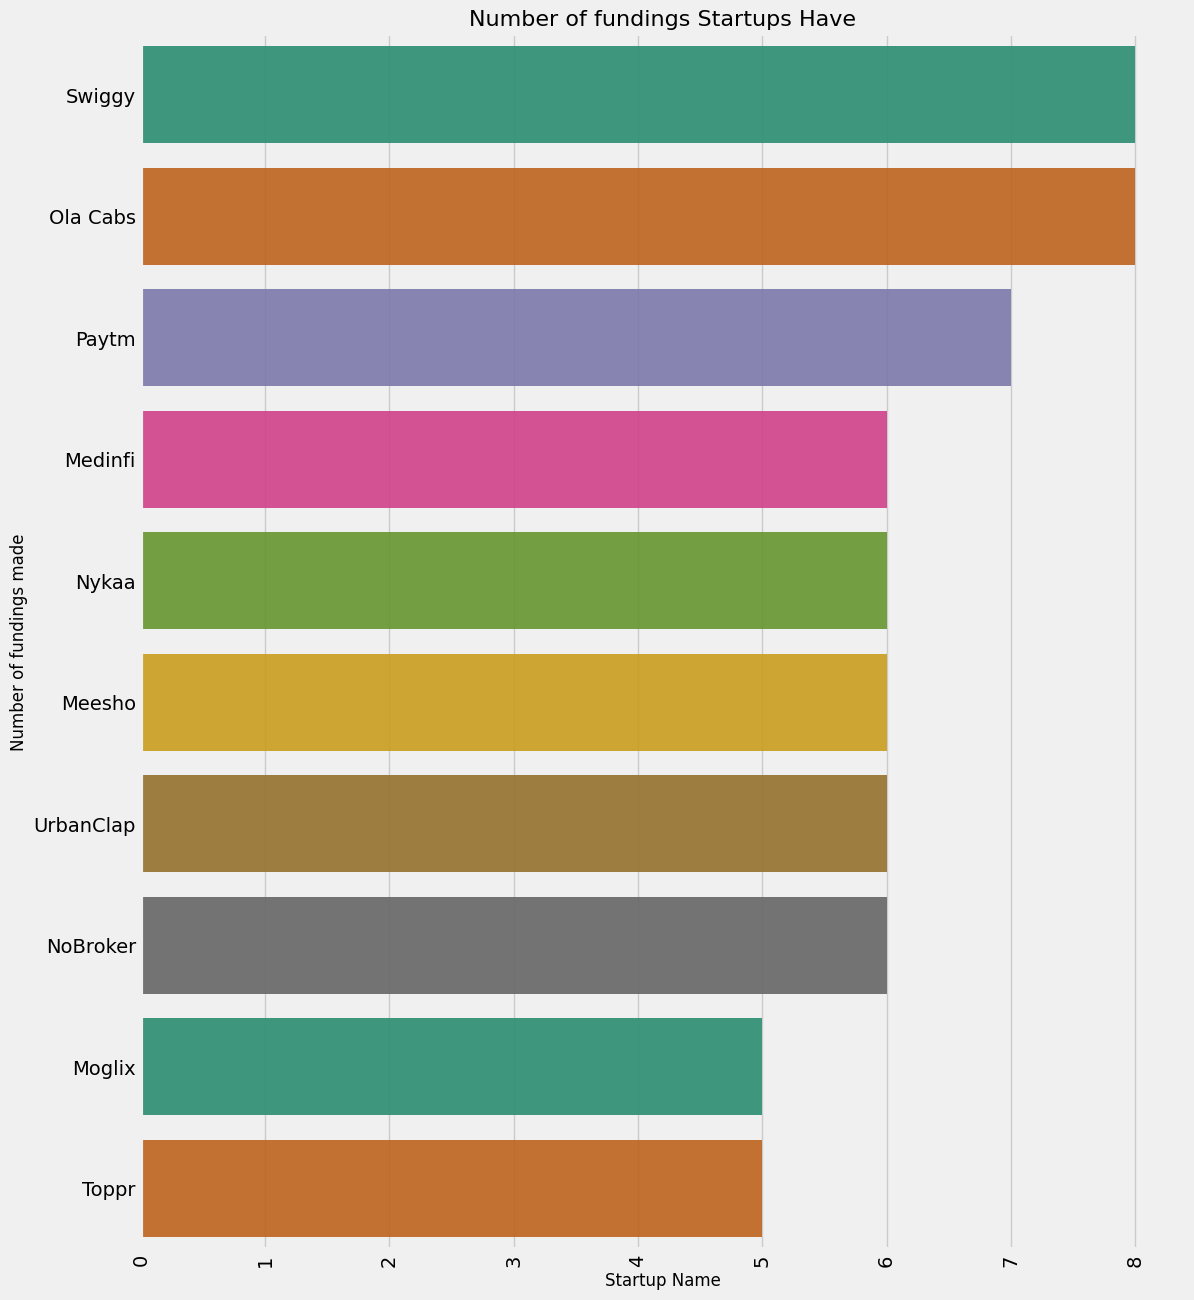

In [810]:
## Looking at the max number of fundings per startup 

no_funding_startup = data['Startup Name'].value_counts().head(10)


# lets plot the data
plt.rcParams['figure.figsize'] = (12, 15)
sns.barplot(y = no_funding_startup.index, x = no_funding_startup.values, alpha=0.9, palette = 'Dark2')
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings Startups Have", fontsize=16)
plt.show()

In [811]:
print('Funding for Ola cabs - Start and end year month  - ' + 
      str(data[data['Startup Name'] == 'Ola Cabs']['yearmonth'].min()) + '-' + 
      str(data[data['Startup Name'] == 'Ola Cabs']['yearmonth'].max()) )

Funding for Ola cabs - Start and end year month  - 201507-201907


## Industries that are prefered for startups 


In [812]:
data['Industry Vertical'].value_counts()

Consumer Internet                            941
Technology                                   478
eCommerce                                    186
nan                                          171
Healthcare                                    70
                                            ... 
Food Discovery & Delivery Mobile app           1
Ridesharing Mobile app                         1
Truck Aggregator & Logistics service           1
Artificial Intelligence Ecommerce Chatbot      1
Online Hotel Booking                           1
Name: Industry Vertical, Length: 822, dtype: int64

In [813]:
data['Industry Vertical'] = data['Industry Vertical'].apply( lambda x : str(x) )

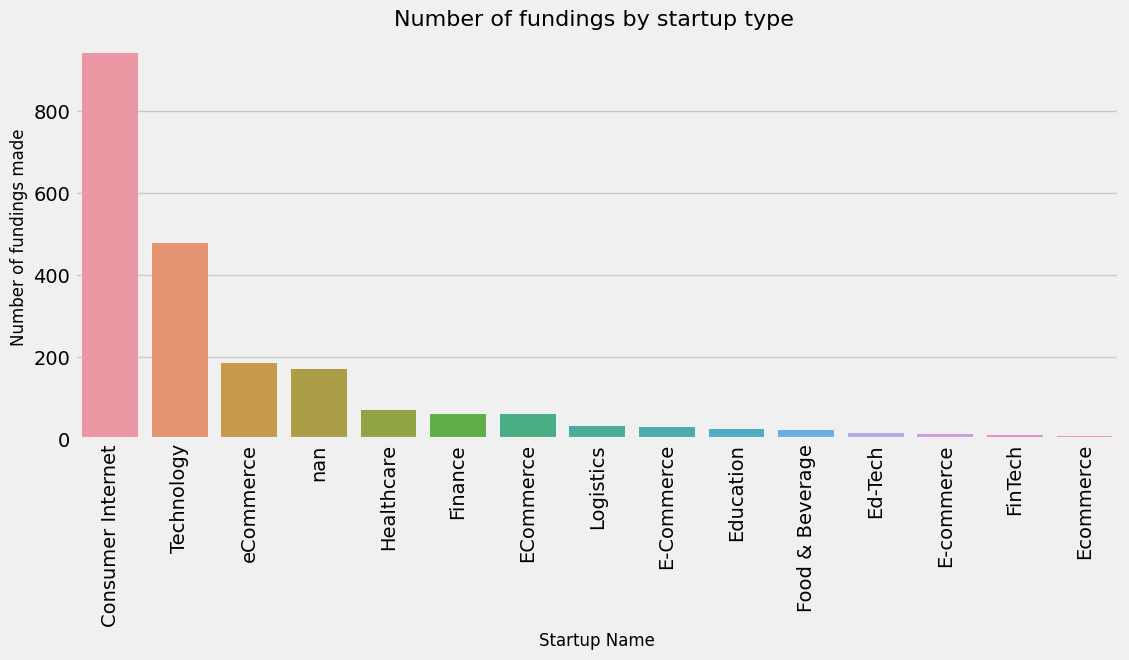

In [814]:
industry_type = data['Industry Vertical'].value_counts().head(15)

plt.rcParams['figure.figsize'] = (12, 5)
sns.barplot(industry_type.index,  industry_type.values)
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings by startup type ", fontsize=16)
plt.show()

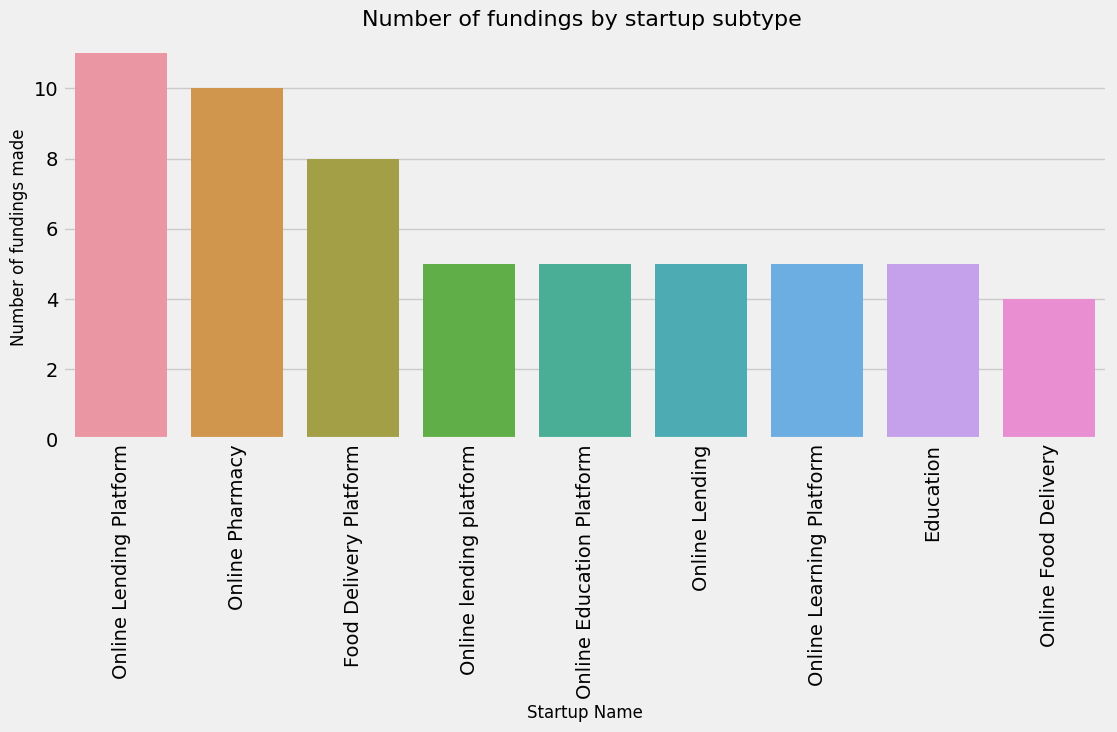

In [815]:
industry_subtype = data['SubVertical'].value_counts().head(10)
industry_subtype = industry_subtype.drop(industry_subtype.index[0])

plt.rcParams['figure.figsize'] = (12, 5)
sns.barplot(industry_subtype.index,  industry_subtype.values)
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings by startup subtype ", fontsize=16)
plt.show()

In [816]:
data['City  Location'] = data['City  Location'].apply(lambda x : 'Bangalore' if x == 'Bengaluru' else x)
city = data['City  Location'].value_counts().head(10)

Text(0.5, 1.0, 'Graph of number of funding and city')

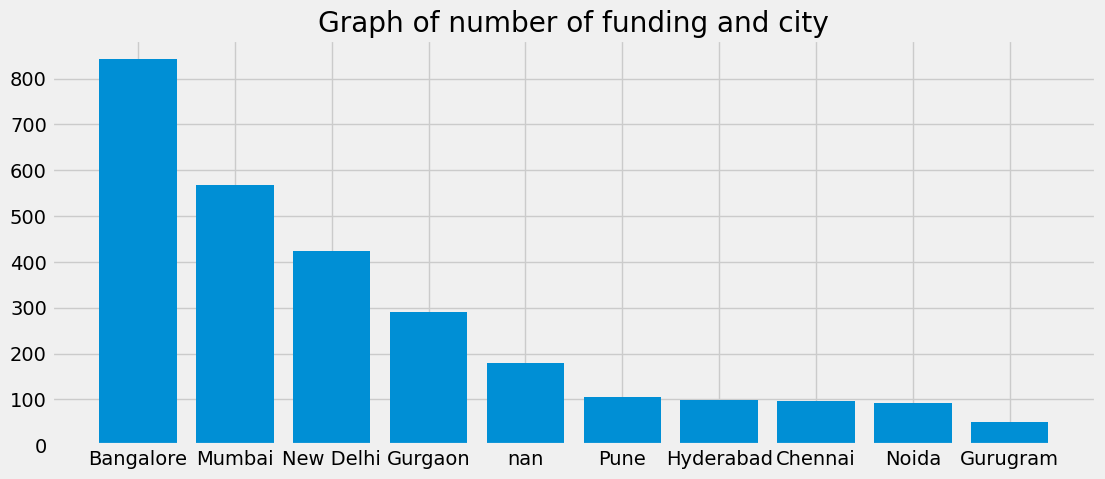

In [817]:
plt.bar(city.index,city.values)
plt.title('Graph of number of funding and city')

Undisclosed Investors       136
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Sequoia Capital              15
Group of Angel Investors     15
Accel Partners               12
Brand Capital                11
Venture Catalysts            11
RoundGlass Partners          10
Name: Investors Name, dtype: int64


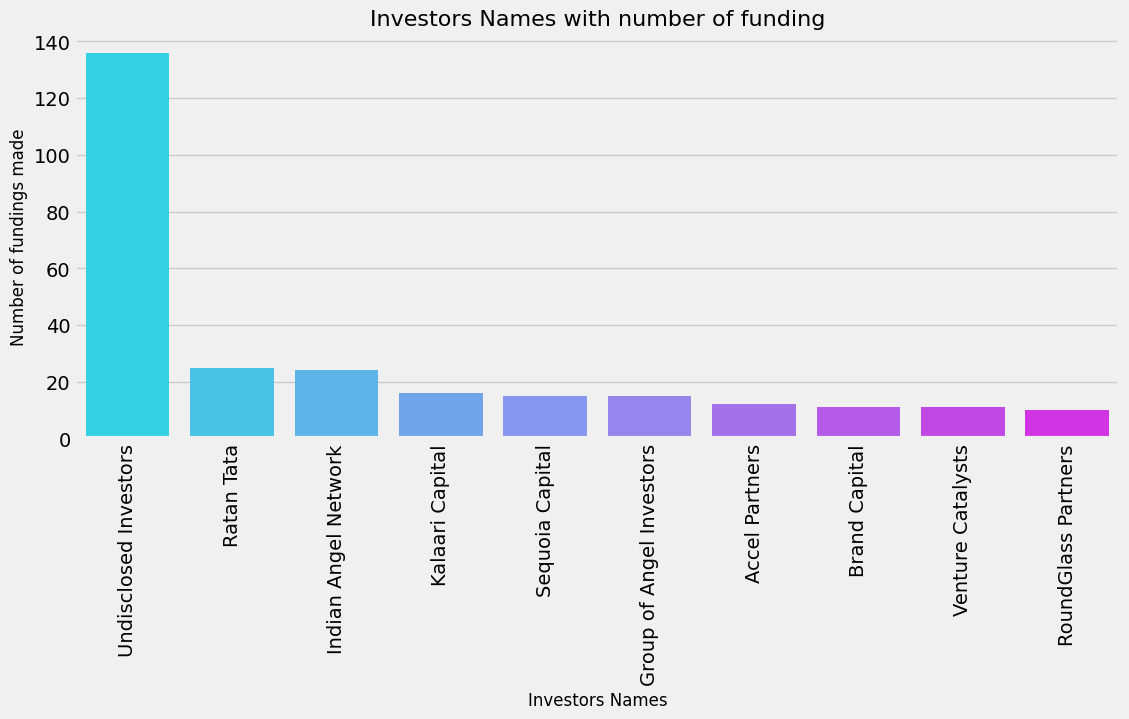

In [818]:
# To plot the top investor typesy

data['Investors Name'][data['Investors Name'] == 'Undisclosed investors'] = 'Undisclosed Investors'
data['Investors Name'][data['Investors Name'] == 'undisclosed Investors'] = 'Undisclosed Investors'
data['Investors Name'][data['Investors Name'] == 'undisclosed investors'] = 'Undisclosed Investors'
data['Investors Name'][data['Investors Name'] == 'Undisclosed investor'] = 'Undisclosed Investors'
data['Investors Name'][data['Investors Name'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
data['Investors Name'][data['Investors Name'] == 'Undisclosed'] = 'Undisclosed Investors'
data['Investors Name'][data['Investors Name'] == 'nan'] = 'Undisclosed Investors'

# lets check the value counts
investors = data['Investors Name'].value_counts().head(10)
print(investors)

# lets plot the data
sns.barplot(investors.index, investors.values, palette = 'cool')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

Private Equity          1356
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Name: InvestmentnType, dtype: int64


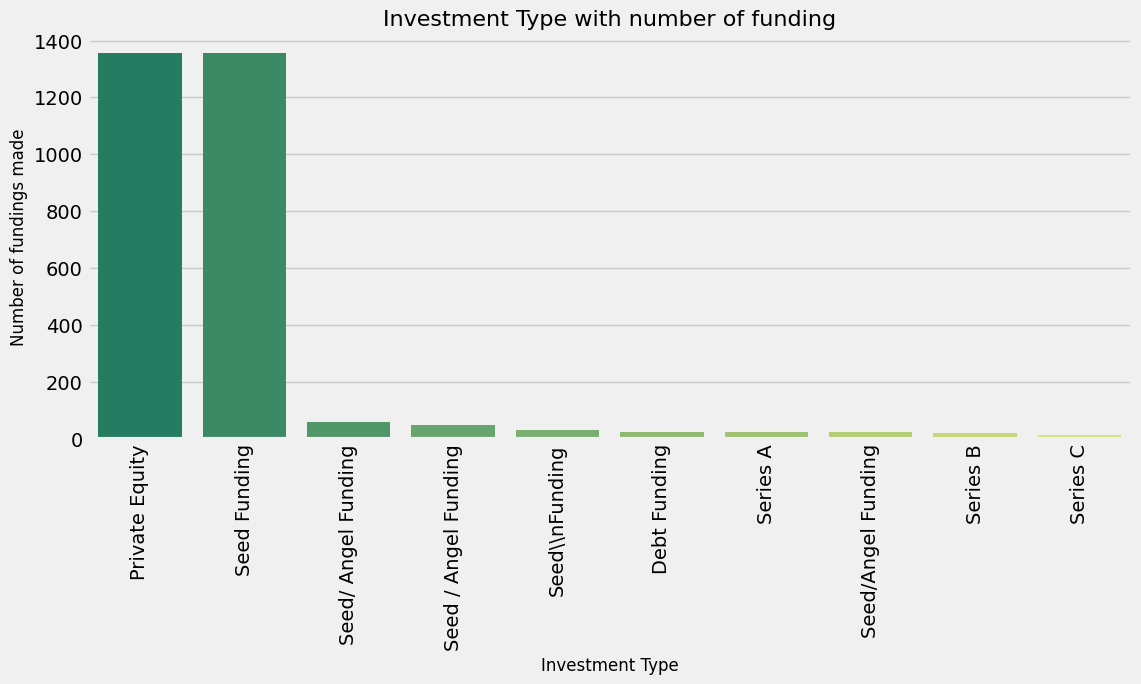

In [819]:
# lets analyze the investment
investment = data['InvestmentnType'].value_counts().head(10)
print(investment)

# lets clean the dataset
data['InvestmentnType'][data['InvestmentnType'] == 'SeedFunding'] = 'Seed Funding'
data['InvestmentnType'][data['InvestmentnType'] == 'Crowd funding'] = 'Crowd Funding'
data['InvestmentnType'][data['InvestmentnType'] == 'PrivateEquity'] = 'Private Equity'

# lets plot the data
sns.barplot(investment.index, investment.values, palette = 'summer')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()

3 graphs to do 

1. grouped bar chart of cities and then their start up type 
2. grouped bar chart of startup type and investors 
3. stacked bar chart of top 15 startups and theor investors 

In [820]:
data1 = data.copy()

### Grouped bar chart of cities and then their start up type 


In [821]:
list1 = data1['City  Location'].value_counts().head(10)
list2 = data1['Industry Vertical'].value_counts().head(5)

In [822]:
data2 = data1[data1['Industry Vertical'].isin(list2.index.tolist())]
data2 = data2[data2['City  Location'].isin(list1.index.tolist())]

In [823]:
pivot_table1 = pd.pivot_table(data2, values='Sr No', columns=['Industry Vertical'],
                              index=['City  Location'], aggfunc = 'count')

In [824]:
pivot_table1

Industry Vertical,Consumer Internet,Healthcare,Technology,eCommerce,nan
City Location,,,,,
Bangalore,287.0,21.0,167.0,45.0,NaN
Chennai,22.0,2.0,25.0,3.0,NaN
Gurgaon,99.0,3.0,31.0,28.0,NaN
Gurugram,20.0,5.0,7.0,NaN,NaN
Hyderabad,30.0,5.0,20.0,5.0,NaN
Mumbai,199.0,11.0,80.0,36.0,NaN
New Delhi,143.0,7.0,47.0,37.0,NaN
Noida,33.0,3.0,17.0,7.0,NaN
Pune,27.0,2.0,38.0,5.0,NaN


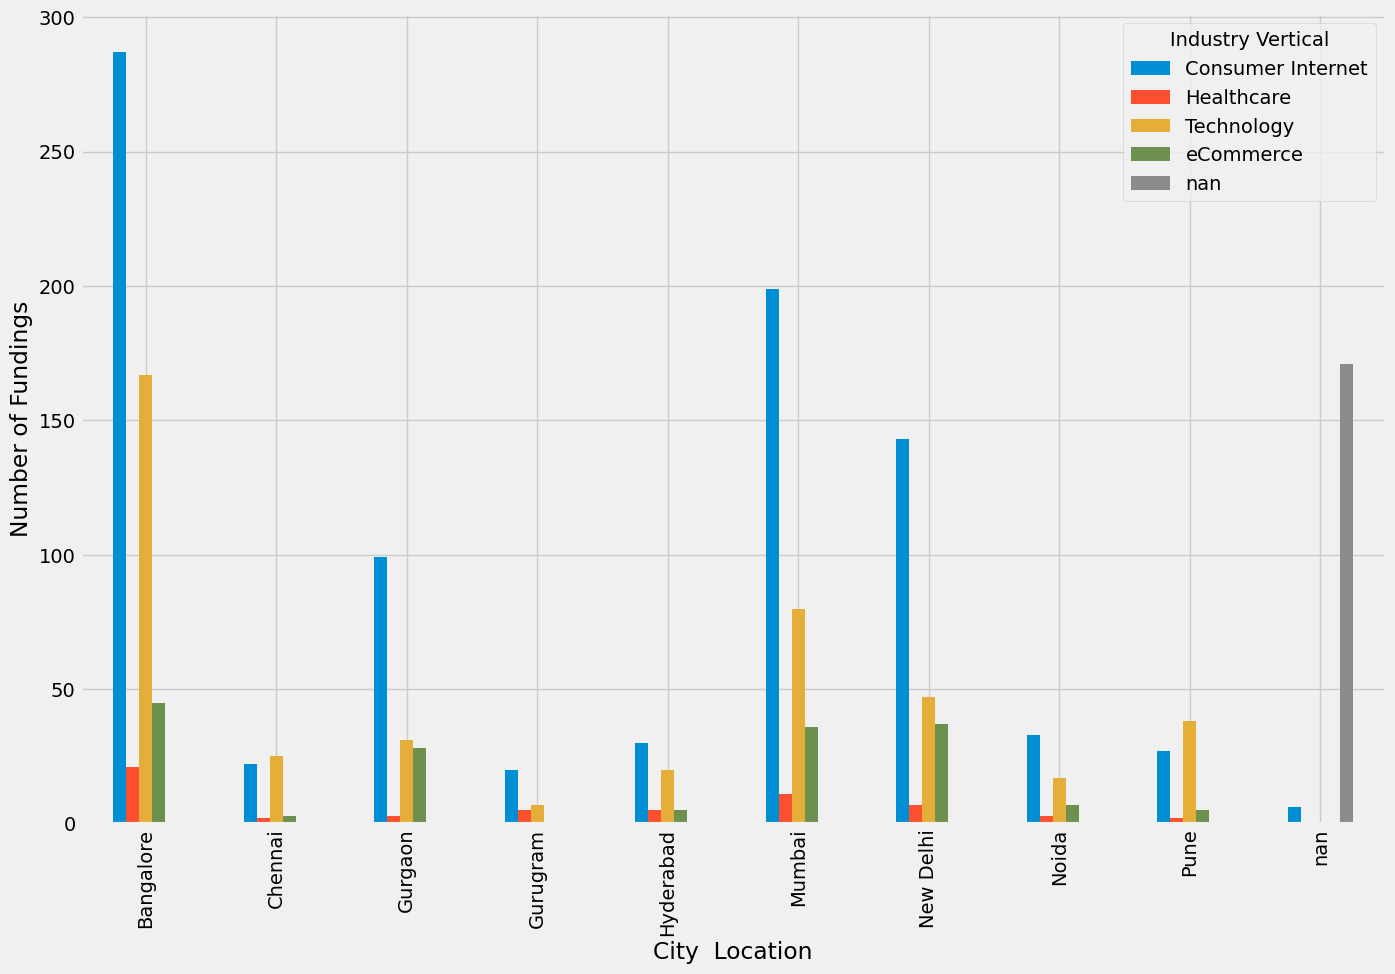

In [825]:
# Plot a bar chart using the DF
ax = pivot_table1.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(15, 10)
# Change the axes labels
#ax.set_xlabel("Cities")
ax.set_ylabel("Number of Fundings")

# Use this to show the plot in a new window
# plt.show()
# Export the plot as a PNG file
fig.savefig("page_views_barplot.png")

The above chart is very insightful because we can see that eCommerce startups have more or less equal funding in major cities like Mumbai, New Delhi, Gurgaon and Bangalore. Even though Bangalore has  high levels of funding for almost all of the top 5 fields. 

It also looks like all startups which have disclosed their location have an Industry Vertical and most of the startups that have not disclosed their location also dont have a industry vertical. This could be becasue of bad data collection or any other resaon 

### Grouped bar chart of startup type and investors / investors type 

In [826]:
list1 = data1['Investors Name'].value_counts().head(10)
list2 = data1['Industry Vertical'].value_counts().head(6)

data2 = data1[data1['Industry Vertical'].isin(list2.index.tolist())]
data2 = data2[data2['Investors Name'].isin(list1.index.tolist())]

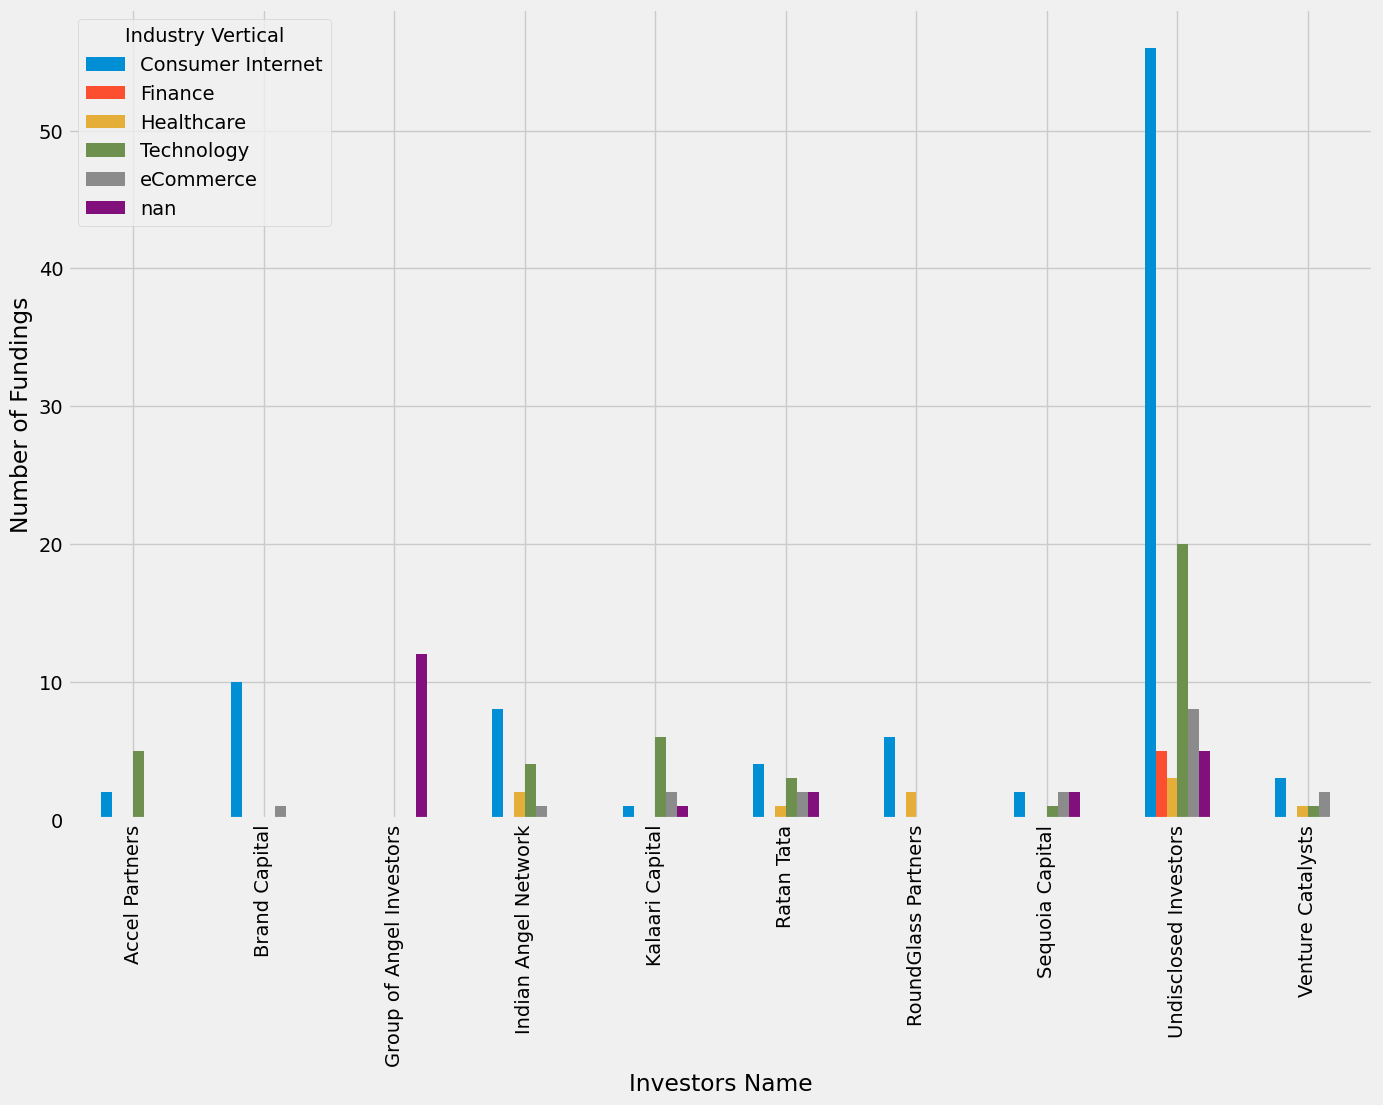

In [827]:
pivot_table1 = pd.pivot_table(data2, values='Sr No', columns=['Industry Vertical'],
                              index=['Investors Name'], aggfunc = 'count')

# Plot a bar chart using the DF
ax = pivot_table1.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(15, 10)
# Change the axes labels
#ax.set_xlabel("Cities")
ax.set_ylabel("Number of Fundings")

# Use this to show the plot in a new window
# plt.show()
# Export the plot as a PNG file
fig.savefig("page_views_barplot.png")

We can see the investors name and number of fundings. Most of the investment is done by undisclosed investors. Angle Investors tend to invest in Industry Verticals that are not properly defined. 

In [849]:
list1 = data1['InvestmentnType'].value_counts().head(10)
list2 = data1['Industry Vertical'].value_counts().head(8)
list3 = data1['Industry Vertical'].value_counts().head(2)


data2 = data1[data1['Industry Vertical'].isin(list2.index.tolist()) & ~data1['Industry Vertical'].isin(list3.index.tolist())]
data2 = data2[data2['InvestmentnType'].isin(list1.index.tolist())]

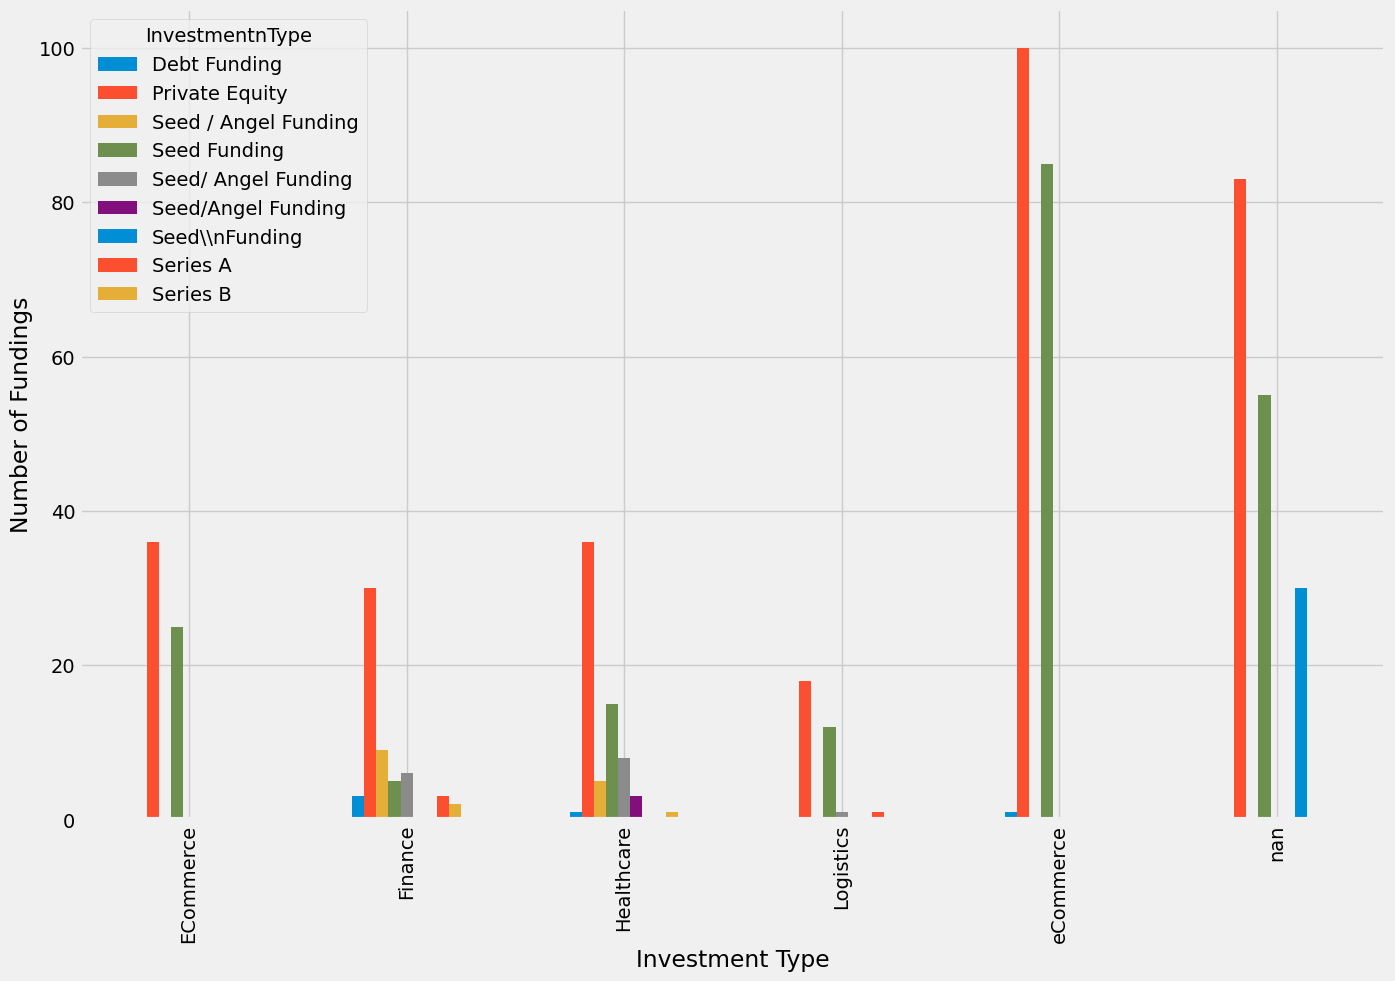

In [850]:
pivot_table1 = pd.pivot_table(data2, values='Sr No', columns=['InvestmentnType'],
                              index=['Industry Vertical'], aggfunc = 'count')

# Plot a bar chart using the DF
ax = pivot_table1.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(15, 10)
# Change the axes labels
ax.set_xlabel("Investment Type")
ax.set_ylabel("Number of Fundings")

# Use this to show the plot in a new window
# plt.show()
# Export the plot as a PNG file
fig.savefig("page_views_barplot.png")

Most of the funding is mainly Private Equity and Seed Funding

### Stacked bar chart of top 15 startups and their investment type 

In [830]:
list1 = data1['Startup Name'].value_counts().head(15)
list2 = data1['InvestmentnType'].value_counts()

data2 = data1[data1['Startup Name'].isin(list1.index.tolist())]
data2 = data2[data2['InvestmentnType'].isin(list2.index.tolist())]


<AxesSubplot:ylabel='Startup Name'>

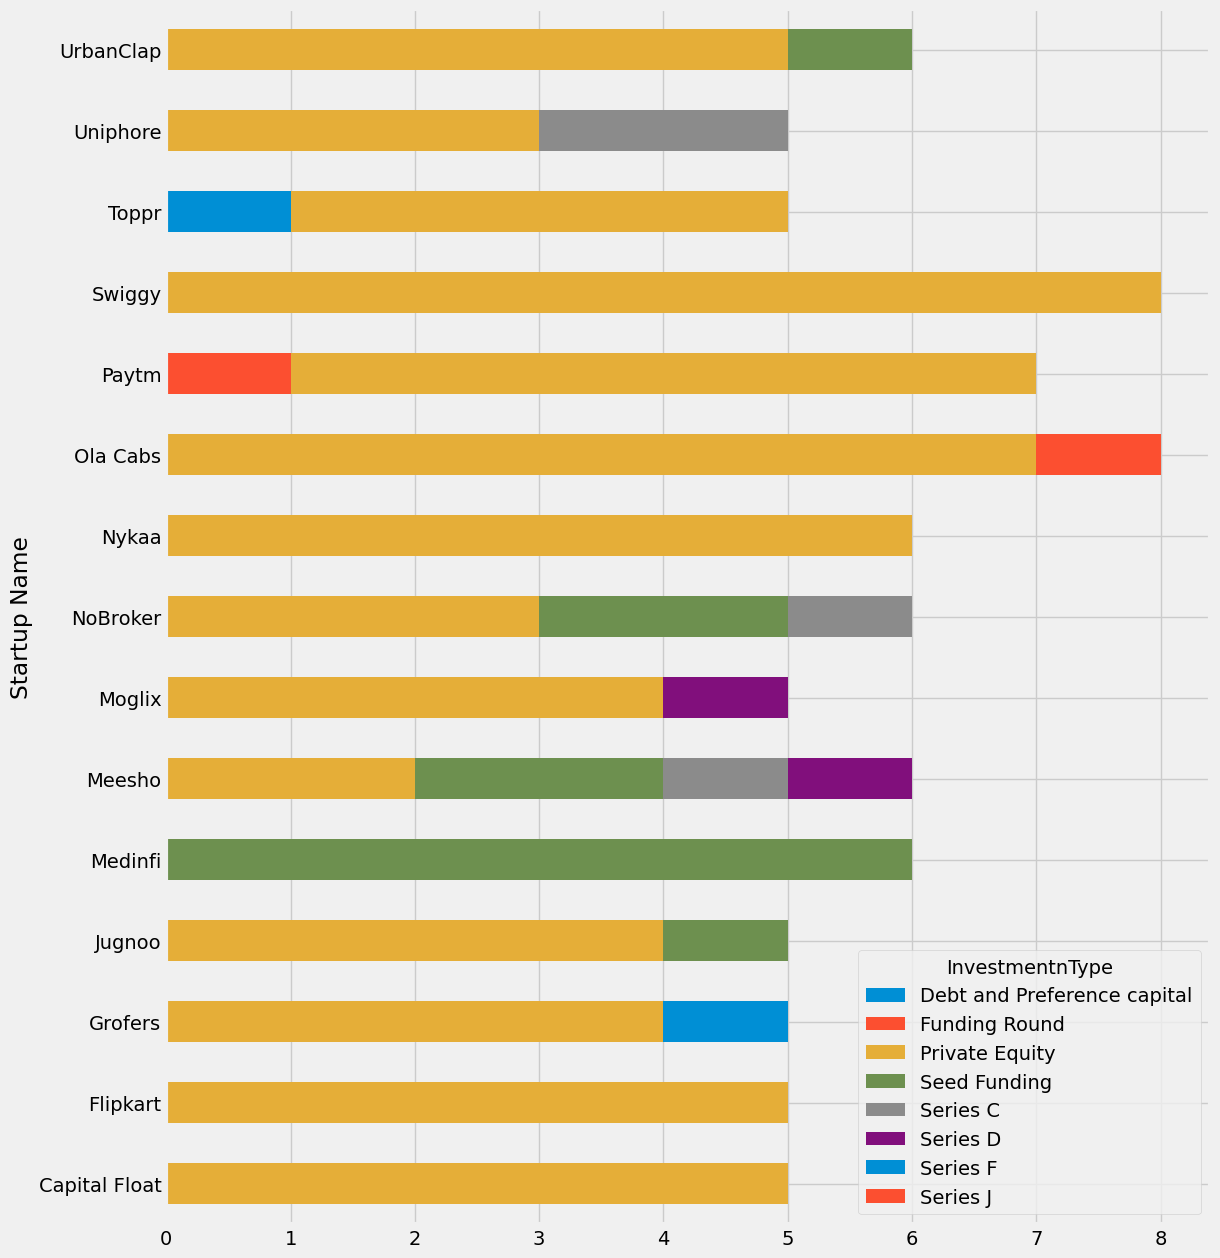

In [831]:
plt.rcParams['figure.figsize'] = (12, 15)

data2.groupby('Startup Name')['InvestmentnType']\
    .value_counts().sort_values(ascending=True)\
    .unstack(level=1)\
    .plot.barh(stacked=True)

We can see that most of the top startups have raised money through private equity 

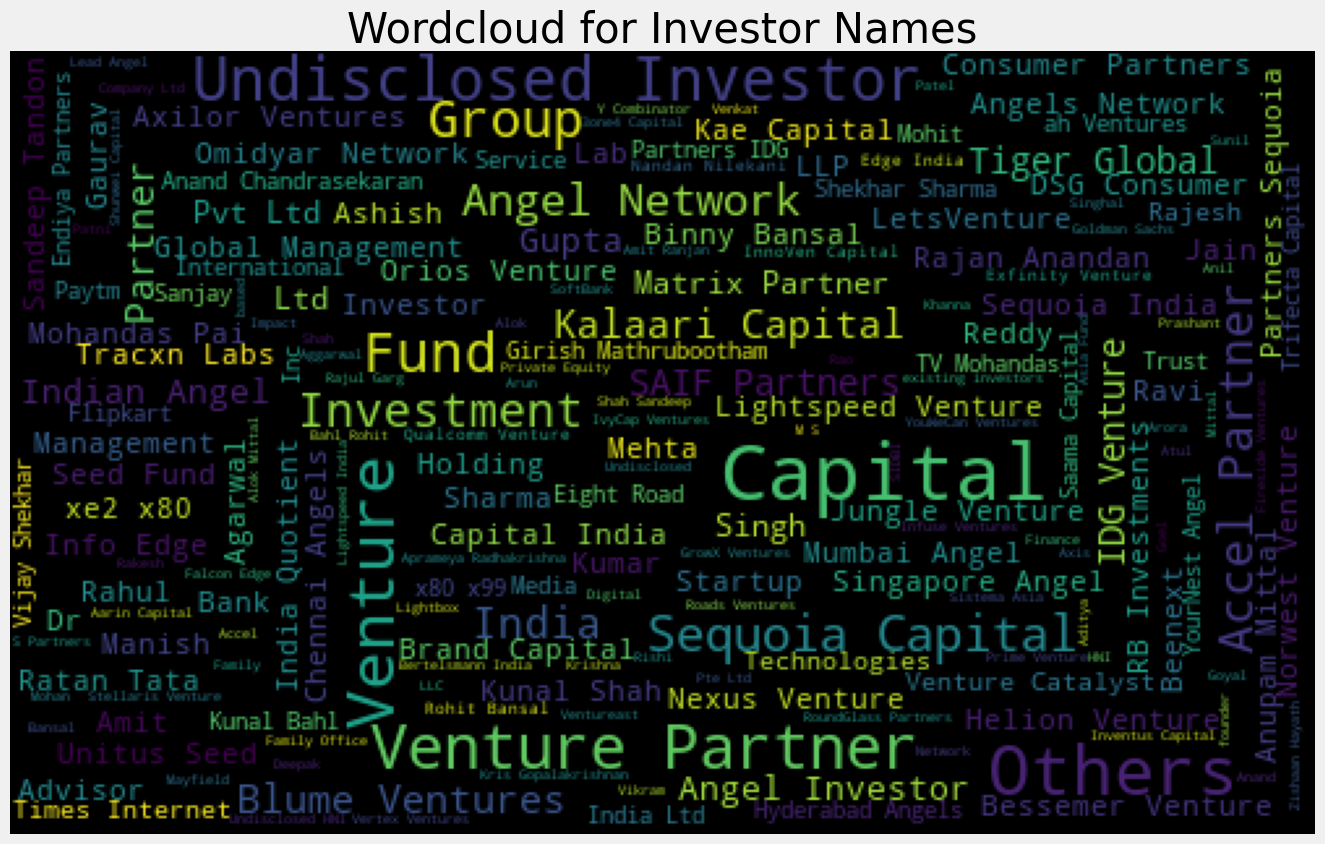

In [853]:
from wordcloud import WordCloud

names = data["Investors Name"]
wordcloud = WordCloud(max_font_size=30, width=500, height=300).generate(' '.join(names))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=30)
plt.axis("off")
plt.show()